In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18,9
rcParams['font.family'] = 'AppleGothic' #malgun Gothic


from google.colab import files     #colab 돌릴때
uploaded = files.upload()          #colab 돌릴때

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


In [ ]:
red = pd.read_csv("winequality-red.csv", sep=';')             # 구분자가 콤마, 가 아닌....  세미콜론;임
print(red.shape)
red.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
import glob      # 묶어주는 라이브러리
import os        # 폴더를 컨트롤

In [ ]:
all_files = glob.glob(os.path.join('wine*'))
all_files

['winequality-red.csv', 'winequality-white.csv']

In [ ]:
all_data = []     # 모든 데이터를 저장하기 위해 빈리스트를 만들어둠

i=0

for file in all_files:
    data = pd.read_csv(file, sep=';')
    data['type']=i
    all_data.append(data)
    i+=1         # 타입을 확인함.   레드는 0, 화이트는 1로 정의하여 와인 구분함.
    
wine = pd.concat(all_data, ignore_index=True)      # 데이터를 합침concat, concat은 axis가 기본값이   0임,  
                                                    #기존인데스를 가지고 와서 6천여개중 4900여개로 표시됨, 그래서 기존 인데스 무시처리

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


> **우리의 목표: 와인성분데이터를 넣으면 와인의 품질을 예측하는 모형

In [ ]:
sorted(wine.quality.unique())             # 목표 변수

[3, 4, 5, 6, 7, 8, 9]

In [ ]:
wine.quality.value_counts()               # 값 별 카운트

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
wine[wine.quality ==9]                   # 특정 값을 지는 리스트를 보고 싶어

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


### 탐색적분석  ------------------------
- 레드와인인지 화이트와인인지에 따라 품질이 다를까?

In [ ]:
wine.groupby('type').quality.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
1,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [ ]:
red_quality = wine.loc[wine.type == 0, 'quality']


In [ ]:
white_quality = wine.loc[wine.type==1, 'quality']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


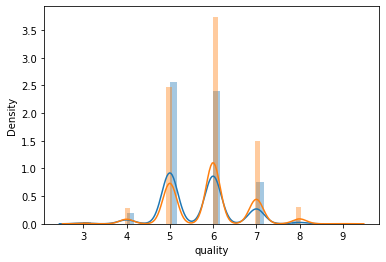

In [ ]:
sns.distplot(red_quality, label='Red')
sns.distplot(white_quality, label="White")

### T검정
- 와인종류에 따른 품질의 차이가 통계적으로 유의한지 확인하기 위함
- p value < 0.05     그래야 유의미한 의미임 95%  ******

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
tstat, pvalue, df = sm.stats.ttest_ind(red_quality, white_quality)

In [ ]:
print("T값은 %.5f, p-value는 %.8f"%(tstat, pvalue))

T값은 -9.68565, p-value는 0.00000000


### 상관관계분석

In [ ]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


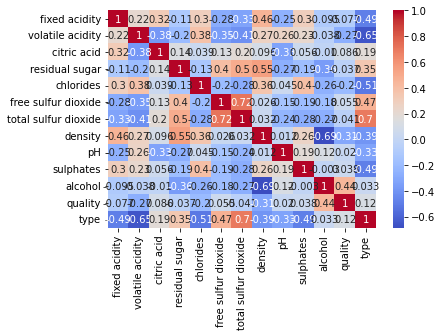

In [ ]:
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')

In [ ]:
#너무 상관관계가 높은 아이들끼리는 같이 쓰지말고 둘중 하나를 쓰는게 좋음 공분산도가 높아짐

In [ ]:
wine.corrwith(wine.quality).sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
type                    0.119323
alcohol                 0.444319
quality                 1.000000
dtype: float64

### 산점도 pairplot
- 모든 회귀문제는 산점도가 있어야 파악이 용이
- 하지만 모든 점을 산점도를 그리면   성능문제발생,   그래서 샘플링을 하여 산점도로 변수간 관계를 만듦

In [ ]:
def sampling(data, n=300):         #와인 샘플링
    return data.loc[np.random.choice(data.index, size=n, replace=False)]        #choice  인덱스 골라냄,  replace 중복미허용F

In [ ]:
red = wine[wine.type ==0]
white = wine[wine.type ==1]

In [ ]:
red_sample = sampling(red)
print(red_sample.shape)
red_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1519,6.6,0.70,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2,5,0
1288,7.0,0.60,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2,5,0
764,9.1,0.68,0.11,2.8,0.093,11.0,44.0,0.99888,3.31,0.55,9.5,6,0
1123,10.7,0.40,0.37,1.9,0.081,17.0,29.0,0.99674,3.12,0.65,11.2,6,0
773,7.9,0.40,0.29,1.8,0.157,1.0,44.0,0.99730,3.30,0.92,9.5,6,0


In [ ]:
white_sample = sampling(white)
print(white_sample.shape)
white_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1901,6.1,0.41,0.00,1.6,0.063,36.0,87.0,0.99140,3.27,0.67,10.8,6,1
4544,4.9,0.33,0.31,1.2,0.016,39.0,150.0,0.98713,3.33,0.59,14.0,8,1
5813,7.0,0.44,0.24,12.1,0.056,68.0,210.0,0.99718,3.05,0.50,9.5,5,1
3091,8.0,0.30,0.49,9.4,0.046,47.0,188.0,0.99640,3.14,0.48,10.0,5,1
3075,7.1,0.85,0.49,8.7,0.028,40.0,184.0,0.99620,3.22,0.36,10.7,5,1


In [ ]:
wine_sample = pd.concat([red_sample, white_sample])

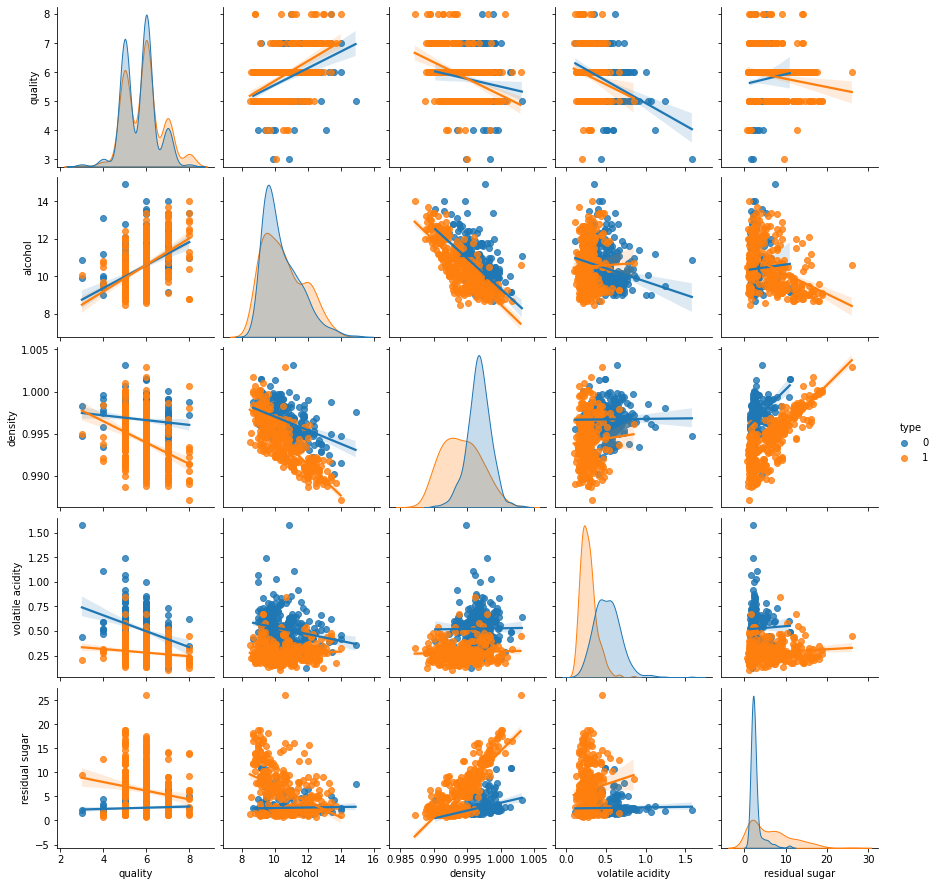

In [ ]:
sns.pairplot(wine_sample, hue='type', kind='reg',
            vars=['quality', 'alcohol', 'density', 'volatile acidity', 'residual sugar'])     #pairplot 회귀문제에서 꼭 필요***

### .
- 선형회귀모형  만들기

In [ ]:
wine.columns = wine.columns.str.replace(' ','_')

In [ ]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [ ]:
features = ['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']                              #예측모델을 만들기 위해 핏쳐 셀렉션을 함

In [ ]:
features_B = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type']

In [ ]:
features_C = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density']

In [ ]:
features_D = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity']

In [ ]:
features_E = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides']

In [ ]:
features_F = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide']

In [ ]:
features_G = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH']

In [ ]:
features_H = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH', 'sulphates']

In [ ]:
y = wine.quality
X = wine[wine.columns.difference(['quality', 'type'])]
X_standard = (X - X.mean())/ X.std()    #표준화 : 단위기준을 맞춤
wine_standard = pd.concat([X_standard, wine.quality, wine.type], axis=1)

In [ ]:
X = wine_standard[features]
X_B = wine_standard[features_B]
X_C = wine_standard[features_C]
X_D = wine_standard[features_D]
X_E = wine_standard[features_E]
X_F = wine_standard[features_F]
X_G = wine_standard[features_G]
X_H = wine_standard[features_H]

# 훈련데이터셋과 테스트데이터셋으로 나누자
### 회귀분석의 경우는.... 훈련데이터셋과 테스트 데이터 셋을 나누어야 함

In [ ]:
from sklearn.model_selection import train_test_split                   #머신러닝 라이브러리는 사이킷런에 있음

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, wine.quality, train_size=0.8, random_state=31)

X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B, wine.quality, train_size=0.8, random_state=31)
X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(X_C, wine.quality, train_size=0.8, random_state=31)
X_D_train, X_D_test, y_D_train, y_D_test = train_test_split(X_D, wine.quality, train_size=0.8, random_state=31)
X_E_train, X_E_test, y_E_train, y_E_test = train_test_split(X_E, wine.quality, train_size=0.8, random_state=31)
X_F_train, X_F_test, y_F_train, y_F_test = train_test_split(X_F, wine.quality, train_size=0.8, random_state=31)
X_G_train, X_G_test, y_G_train, y_G_test = train_test_split(X_G, wine.quality, train_size=0.8, random_state=31)
X_H_train, X_H_test, y_H_train, y_H_test = train_test_split(X_H, wine.quality, train_size=0.8, random_state=31)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 10)
(1300, 10)
(5197,)
(1300,)


In [ ]:
print(X_B_train.shape)
print(X_B_test.shape)
print(y_B_train.shape)
print(y_B_test.shape)

(5197, 5)
(1300, 5)
(5197,)
(1300,)


In [ ]:
# 모델정의


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model_B = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model_B.fit(X_B_train, y_B_train)

LinearRegression()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
prediction_B = model_B.predict(X_B_test)

In [ ]:
prediction

array([5.60905571, 5.62501168, 6.17583394, ..., 5.29490736, 6.05439488,
       5.41107896])

In [ ]:
prediction_B

array([5.65532853, 5.58009165, 6.20560955, ..., 5.40446072, 5.88161446,
       5.32981546])

### 모델평가

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test, prediction)

0.5526961889267856

In [ ]:
metrics.mean_absolute_error(y_B_test, prediction_B)

0.5623562106847024

In [ ]:
metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

0.4884991903691603

In [ ]:
metrics.mean_squared_error(y_B_test, prediction_B)   

0.49952257208049156

### 하단 개인작업구간

### 숫자를 떨어뜨려라  (과제)
- 1. 그전에 핏쳐의 셀렉션과 조합, 핏처 엔지니어링... 등
- 2. 하이퍼 파라메터 수정해가며 수정
- 3. 랜덤포레스트 이용.

> **metrics.mean_squared_error(y_test, prediction)   오류율 낮추기 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
test_model = RandomForestRegressor(n_estimators = 300, 
                                  max_depth = 10, 
                                  max_features =0.9,
                                  random_state=31)

In [ ]:
cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10)                 #'neg_mean_squared_error'

array([-0.44991263, -0.47870985, -0.42840055, -0.47093158, -0.40696158,
       -0.33987749, -0.39503184, -0.48109935, -0.47319203, -0.44150803])

In [ ]:
cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10).mean()

-0.4365624925593471

In [ ]:
hyper_result =[]

max_depth = [3,5,7,9,11,13]
max_feature = [0.7,0.8,0.9,1.0]


for a in max_depth:
    for b in max_feature:
        model = RandomForestRegressor(n_estimators = 300, 
                                          max_depth = a, 
                                          max_features =b,
                                          min_samples_split=2,
                                          min_samples_leaf=1,
                                          random_state=31)

        score = cross_val_score(model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10).mean()

        hyper_result.append({'점수' : score,
                             '피쳐모델' : "basic",
                             'MAX_depth': a,
                             'MAX_features': b})
              

        print("현재 스코어는 {0:.5f}".format(score))


현재 스코어는 -0.55779
현재 스코어는 -0.55789
현재 스코어는 -0.55805
현재 스코어는 -0.55927
현재 스코어는 -0.51258
현재 스코어는 -0.51309
현재 스코어는 -0.51358
현재 스코어는 -0.51400
현재 스코어는 -0.47812
현재 스코어는 -0.47875
현재 스코어는 -0.47971
현재 스코어는 -0.48055
현재 스코어는 -0.44938
현재 스코어는 -0.44918
현재 스코어는 -0.45016
현재 스코어는 -0.45057
현재 스코어는 -0.42423
현재 스코어는 -0.42503
현재 스코어는 -0.42633
현재 스코어는 -0.42609
현재 스코어는 -0.40527
현재 스코어는 -0.40689
현재 스코어는 -0.40885
현재 스코어는 -0.40919


In [ ]:
pd.DataFrame(hyper_result).sort_values(by='점수', ascending=False) 

,점수,피쳐모델,MAX_depth,MAX_features
20,-0.405268,basic,13,0.7
21,-0.406890,basic,13,0.8
22,-0.408854,basic,13,0.9
23,-0.409187,basic,13,1.0
16,-0.424230,basic,11,0.7
17,-0.425031,basic,11,0.8
19,-0.426087,basic,11,1.0
18,-0.426328,basic,11,0.9
13,-0.449183,basic,9,0.8
12,-0.449380,basic,9,0.7


In [ ]:
hyper_result_B =[]

max_depth = [3,5,7,9,11,13]
max_feature = [0.7,0.8,0.9,1.0]


for a in max_depth:
    for b in max_feature:
        model_B = RandomForestRegressor(n_estimators = 500, 
                                          max_depth = a, 
                                          max_features =b,
                                          min_samples_split=2,
                                          min_samples_leaf=1,
                                          random_state=31)

        score_B = cross_val_score(model_B, X_B_train, y_B_train, scoring= 'neg_mean_squared_error', cv=5).mean()

        hyper_result_B.append({'점수' : score_B,
                             '피쳐모델' : "B",
                             'MAX_depth': a,
                             'MAX_features': b})
              

        print("현재 스코어는 {0:.5f}".format(score_B))


현재 스코어는 -0.57062
현재 스코어는 -0.56757
현재 스코어는 -0.56757
현재 스코어는 -0.56731
현재 스코어는 -0.53923
현재 스코어는 -0.53829
현재 스코어는 -0.53829
현재 스코어는 -0.53751
현재 스코어는 -0.52089
현재 스코어는 -0.52073
현재 스코어는 -0.52073
현재 스코어는 -0.52236
현재 스코어는 -0.50375
현재 스코어는 -0.50412
현재 스코어는 -0.50412
현재 스코어는 -0.50561
현재 스코어는 -0.48788
현재 스코어는 -0.48903
현재 스코어는 -0.48903
현재 스코어는 -0.49052
현재 스코어는 -0.47503
현재 스코어는 -0.47753
현재 스코어는 -0.47753
현재 스코어는 -0.48022


In [ ]:
pd.DataFrame(hyper_result_B).sort_values(by='점수', ascending=False) 

,점수,피쳐모델,MAX_depth,MAX_features
20,-0.475031,B,13,0.7
22,-0.477528,B,13,0.9
21,-0.477528,B,13,0.8
23,-0.480219,B,13,1.0
16,-0.487883,B,11,0.7
18,-0.489029,B,11,0.9
17,-0.489029,B,11,0.8
19,-0.490524,B,11,1.0
12,-0.503752,B,9,0.7
13,-0.504119,B,9,0.8


In [ ]:
hyper_result_C =[]



max_depth = [3,5,7,9,11,13]
max_feature = [0.7,0.8,0.9,1.0]


for a in max_depth:
    for b in max_feature:

        model_C = RandomForestRegressor(n_estimators = 500, 
                                      max_depth = a, 
                                      max_features =b,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      random_state=31)

        
        score_C = cross_val_score(model_C, X_C_train, y_C_train, scoring= 'neg_mean_squared_error', cv=5).mean()


        hyper_result_C.append({'점수' : score_C,
                               '피쳐모델' : "C",
                               'MAX_depth': a,
                               'MAX_features': b})      
        

        print("현재 스코어는 {0:.5f}".format(score_C))


현재 스코어는 -0.57053
현재 스코어는 -0.57053
현재 스코어는 -0.56773
현재 스코어는 -0.56731
현재 스코어는 -0.53941
현재 스코어는 -0.53941
현재 스코어는 -0.53822
현재 스코어는 -0.53758
현재 스코어는 -0.52161
현재 스코어는 -0.52161
현재 스코어는 -0.52169
현재 스코어는 -0.52258
현재 스코어는 -0.50396
현재 스코어는 -0.50396
현재 스코어는 -0.50479
현재 스코어는 -0.50574
현재 스코어는 -0.48747
현재 스코어는 -0.48747
현재 스코어는 -0.48906
현재 스코어는 -0.49054
현재 스코어는 -0.47572
현재 스코어는 -0.47572
현재 스코어는 -0.47730
현재 스코어는 -0.48005


In [ ]:
pd.DataFrame(hyper_result_C).sort_values(by='점수', ascending=False) 


,점수,피쳐모델,MAX_depth,MAX_features
21,-0.475725,C,13,0.8
20,-0.475725,C,13,0.7
22,-0.477304,C,13,0.9
23,-0.480053,C,13,1.0
17,-0.487467,C,11,0.8
16,-0.487467,C,11,0.7
18,-0.489058,C,11,0.9
19,-0.490536,C,11,1.0
13,-0.503957,C,9,0.8
12,-0.503957,C,9,0.7


In [ ]:
hyper_result_D =[]



max_depth = [3,5,7,9,11,13]
max_feature = [0.7,0.8,0.9,1.0]


for a in max_depth:
    for b in max_feature:

        model_D = RandomForestRegressor(n_estimators = 500, 
                                      max_depth = a, 
                                      max_features =b,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      random_state=31)

        
        score_D = cross_val_score(model_D, X_D_train, y_D_train, scoring= 'neg_mean_squared_error', cv=5).mean()


        hyper_result_D.append({'점수' : score_D,
                               '피쳐모델' : "D",
                               'MAX_depth': a,
                               'MAX_features': b})      
        

        print("현재 스코어는 {0:.5f}".format(score_D))


현재 스코어는 -0.57283
현재 스코어는 -0.56893
현재 스코어는 -0.56756
현재 스코어는 -0.56769
현재 스코어는 -0.53943
현재 스코어는 -0.53747
현재 스코어는 -0.53731
현재 스코어는 -0.53752
현재 스코어는 -0.51735
현재 스코어는 -0.51731
현재 스코어는 -0.51813
현재 스코어는 -0.51925
현재 스코어는 -0.49724
현재 스코어는 -0.49768
현재 스코어는 -0.49861
현재 스코어는 -0.50004
현재 스코어는 -0.47793
현재 스코어는 -0.47911
현재 스코어는 -0.48073
현재 스코어는 -0.48221
현재 스코어는 -0.46296
현재 스코어는 -0.46410
현재 스코어는 -0.46691
현재 스코어는 -0.46797


In [ ]:
pd.DataFrame(hyper_result_D).sort_values(by='점수', ascending=False) 

,점수,피쳐모델,MAX_depth,MAX_features
20,-0.462962,D,13,0.7
21,-0.464100,D,13,0.8
22,-0.466906,D,13,0.9
23,-0.467965,D,13,1.0
16,-0.477931,D,11,0.7
17,-0.479110,D,11,0.8
18,-0.480734,D,11,0.9
19,-0.482209,D,11,1.0
12,-0.497239,D,9,0.7
13,-0.497678,D,9,0.8


In [ ]:
hyper_result_E =[]



max_depth = [3,5,7,9,11,13]
max_feature = [0.7,0.8,0.9,1.0]


for a in max_depth:
    for b in max_feature:

        model_E = RandomForestRegressor(n_estimators = 500, 
                                      max_depth = a, 
                                      max_features =b,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      random_state=31)

        
        score_E = cross_val_score(model_E, X_E_train, y_E_train, scoring= 'neg_mean_squared_error', cv=5).mean()


        hyper_result_E.append({'점수' : score_E,
                               '피쳐모델' : "E",
                               'MAX_depth': a,
                               'MAX_features': b})      
        

        print("현재 스코어는 {0:.5f}".format(score_E))


현재 스코어는 -0.57172
현재 스코어는 -0.56881
현재 스코어는 -0.56765
현재 스코어는 -0.56777
현재 스코어는 -0.53818
현재 스코어는 -0.53724
현재 스코어는 -0.53698
현재 스코어는 -0.53701
현재 스코어는 -0.51514
현재 스코어는 -0.51513
현재 스코어는 -0.51605
현재 스코어는 -0.51701
현재 스코어는 -0.49266
현재 스코어는 -0.49439
현재 스코어는 -0.49398
현재 스코어는 -0.49653
현재 스코어는 -0.47311
현재 스코어는 -0.47415
현재 스코어는 -0.47461
현재 스코어는 -0.47747
현재 스코어는 -0.45708
현재 스코어는 -0.45990
현재 스코어는 -0.46043
현재 스코어는 -0.46294


In [ ]:
pd.DataFrame(hyper_result_E).sort_values(by='점수', ascending=False) 

,점수,피쳐모델,MAX_depth,MAX_features
20,-0.457084,E,13,0.7
21,-0.459898,E,13,0.8
22,-0.460433,E,13,0.9
23,-0.462942,E,13,1.0
16,-0.473112,E,11,0.7
17,-0.474145,E,11,0.8
18,-0.474613,E,11,0.9
19,-0.477466,E,11,1.0
12,-0.492661,E,9,0.7
14,-0.493975,E,9,0.9


In [ ]:
hyper_result_F =[]



max_depth = [3,5,7,9,11,13]
max_feature = [0.7,0.8,0.9,1.0]


for a in max_depth:
    for b in max_feature:

        model_F = RandomForestRegressor(n_estimators = 500, 
                                      max_depth = a, 
                                      max_features =b,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      random_state=31)

        
        score_F = cross_val_score(model_F, X_F_train, y_F_train, scoring= 'neg_mean_squared_error', cv=5).mean()


        hyper_result_F.append({'점수' : score_F,
                               '피쳐모델' : "F",
                               'MAX_depth': a,
                               'MAX_features': b})      
        

        print("현재 스코어는 {0:.5f}".format(score_F))


현재 스코어는 -0.56096
현재 스코어는 -0.55950
현재 스코어는 -0.55958
현재 스코어는 -0.56114
현재 스코어는 -0.52163
현재 스코어는 -0.52166
현재 스코어는 -0.52235
현재 스코어는 -0.52285
현재 스코어는 -0.49259
현재 스코어는 -0.49328
현재 스코어는 -0.49388
현재 스코어는 -0.49521
현재 스코어는 -0.46696
현재 스코어는 -0.46855
현재 스코어는 -0.46892
현재 스코어는 -0.47026
현재 스코어는 -0.44510
현재 스코어는 -0.44661
현재 스코어는 -0.44824
현재 스코어는 -0.44899
현재 스코어는 -0.42909
현재 스코어는 -0.43028
현재 스코어는 -0.43171
현재 스코어는 -0.43371


In [ ]:
pd.DataFrame(hyper_result_F).sort_values(by='점수', ascending=False) 

,점수,피쳐모델,MAX_depth,MAX_features
20,-0.429092,F,13,0.7
21,-0.430282,F,13,0.8
22,-0.431707,F,13,0.9
23,-0.433714,F,13,1.0
16,-0.445095,F,11,0.7
17,-0.446610,F,11,0.8
18,-0.448242,F,11,0.9
19,-0.448986,F,11,1.0
12,-0.466964,F,9,0.7
13,-0.468549,F,9,0.8


In [ ]:
hyper_result_G =[]



max_depth = [3,5,7,9,11,13]
max_feature = [0.7,0.8,0.9,1.0]


for a in max_depth:
    for b in max_feature:

        model_G = RandomForestRegressor(n_estimators = 500, 
                                      max_depth = a, 
                                      max_features =b,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      random_state=31)

        
        score_G = cross_val_score(model_G, X_G_train, y_G_train, scoring= 'neg_mean_squared_error', cv=5).mean()


        hyper_result_G.append({'점수' : score_G,
                               '피쳐모델' : "G",
                               'MAX_depth': a,
                               'MAX_features': b})      
        

        print("현재 스코어는 {0:.5f}".format(score_G))


현재 스코어는 -0.56022
현재 스코어는 -0.55926
현재 스코어는 -0.55973
현재 스코어는 -0.56126
현재 스코어는 -0.52009
현재 스코어는 -0.52084
현재 스코어는 -0.52162
현재 스코어는 -0.52250
현재 스코어는 -0.48948
현재 스코어는 -0.49108
현재 스코어는 -0.49148
현재 스코어는 -0.49284
현재 스코어는 -0.46359
현재 스코어는 -0.46466
현재 스코어는 -0.46562
현재 스코어는 -0.46642
현재 스코어는 -0.44121
현재 스코어는 -0.44291
현재 스코어는 -0.44308
현재 스코어는 -0.44492
현재 스코어는 -0.42558
현재 스코어는 -0.42710
현재 스코어는 -0.42824
현재 스코어는 -0.42978


In [ ]:
pd.DataFrame(hyper_result_G).sort_values(by='점수', ascending=False) 

,점수,피쳐모델,MAX_depth,MAX_features
20,-0.425580,G,13,0.7
21,-0.427100,G,13,0.8
22,-0.428238,G,13,0.9
23,-0.429784,G,13,1.0
16,-0.441207,G,11,0.7
17,-0.442913,G,11,0.8
18,-0.443079,G,11,0.9
19,-0.444922,G,11,1.0
12,-0.463594,G,9,0.7
13,-0.464663,G,9,0.8


In [ ]:
hyper_result_H =[]



max_depth = [3,5,7,9,11,13]
max_feature = [0.7,0.8,0.9,1.0]


for a in max_depth:
    for b in max_feature:

        model_H = RandomForestRegressor(n_estimators = 500, 
                                      max_depth = a, 
                                      max_features =b,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      random_state=31)

        
        score_H = cross_val_score(model_H, X_H_train, y_H_train, scoring= 'neg_mean_squared_error', cv=5).mean()


        hyper_result_H.append({'점수' : score_H,
                               '피쳐모델' : "H",
                               'MAX_depth': a,
                               'MAX_features': b})      
        

        print("현재 스코어는 {0:.5f}".format(score_H))


현재 스코어는 -0.55890
현재 스코어는 -0.55746
현재 스코어는 -0.55639
현재 스코어는 -0.55773
현재 스코어는 -0.51305
현재 스코어는 -0.51116
현재 스코어는 -0.51140
현재 스코어는 -0.51265
현재 스코어는 -0.47926
현재 스코어는 -0.47991
현재 스코어는 -0.47884
현재 스코어는 -0.48058
현재 스코어는 -0.45131
현재 스코어는 -0.45074
현재 스코어는 -0.45150
현재 스코어는 -0.45375
현재 스코어는 -0.42765
현재 스코어는 -0.42825
현재 스코어는 -0.42938
현재 스코어는 -0.43174
현재 스코어는 -0.41286
현재 스코어는 -0.41295
현재 스코어는 -0.41387
현재 스코어는 -0.41678


In [ ]:
pd.DataFrame(hyper_result_H).sort_values(by='점수', ascending=False) 

,점수,피쳐모델,MAX_depth,MAX_features
20,-0.412864,H,13,0.7
21,-0.412952,H,13,0.8
22,-0.413867,H,13,0.9
23,-0.416784,H,13,1.0
16,-0.427653,H,11,0.7
17,-0.428250,H,11,0.8
18,-0.429377,H,11,0.9
19,-0.431735,H,11,1.0
13,-0.450738,H,9,0.8
12,-0.451307,H,9,0.7


In [ ]:
print(pd.DataFrame(hyper_result)['점수'].max())
print(pd.DataFrame(hyper_result_B)['점수'].max())
print(pd.DataFrame(hyper_result_C)['점수'].max())
print(pd.DataFrame(hyper_result_D)['점수'].max())
print(pd.DataFrame(hyper_result_E)['점수'].max())
print(pd.DataFrame(hyper_result_F)['점수'].max())
print(pd.DataFrame(hyper_result_G)['점수'].max())
print(pd.DataFrame(hyper_result_H)['점수'].max())

-0.40526813458040706
-0.47503084522009154
-0.4757246606904669
-0.46296157613644107
-0.45708402802400416
-0.4290921535067647
-0.42558014676166794
-0.4128639160357069


In [ ]:
# 최종 모델정의

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Finalmodel = RandomForestRegressor()
Finalmodel_B = RandomForestRegressor()
Finalmodel_C = RandomForestRegressor()
Finalmodel_D = RandomForestRegressor()
Finalmodel_E = RandomForestRegressor()
Finalmodel_F = RandomForestRegressor()
Finalmodel_G = RandomForestRegressor()
Finalmodel_H = RandomForestRegressor()

In [ ]:
Finalmodel.fit(X_train, y_train)
Finalmodel_B.fit(X_B_train, y_B_train)
Finalmodel_C.fit(X_C_train, y_C_train)
Finalmodel_D.fit(X_D_train, y_D_train)
Finalmodel_E.fit(X_E_train, y_E_train)
Finalmodel_F.fit(X_F_train, y_F_train)
Finalmodel_G.fit(X_G_train, y_G_train)
Finalmodel_H.fit(X_H_train, y_H_train)


RandomForestRegressor()

In [ ]:
prediction = Finalmodel.predict(X_test)

In [ ]:
prediction_B = Finalmodel_B.predict(X_B_test)
prediction_C = Finalmodel_C.predict(X_C_test)
prediction_D = Finalmodel_D.predict(X_D_test)
prediction_E = Finalmodel_E.predict(X_E_test)
prediction_F = Finalmodel_F.predict(X_F_test)
prediction_G = Finalmodel_G.predict(X_G_test)
prediction_H = Finalmodel_H.predict(X_H_test)

In [ ]:
prediction

array([5.96, 5.63, 6.88, ..., 5.7 , 6.46, 5.44])

In [ ]:
prediction_B

array([5.99, 5.24, 6.97, ..., 5.67, 6.86, 5.21])

In [ ]:
prediction_C

array([5.97 , 5.44 , 6.99 , ..., 5.54 , 6.835, 5.01 ])

In [ ]:
prediction_D

array([6.  , 5.38, 6.97, ..., 5.87, 6.84, 5.15])

In [ ]:
prediction_E

array([6.  , 5.17, 6.93, ..., 5.77, 6.6 , 5.26])

In [ ]:
prediction_F

array([5.98, 5.37, 6.94, ..., 5.81, 6.56, 5.37])

In [ ]:
prediction_G

array([5.97, 5.46, 6.93, ..., 5.68, 6.49, 5.32])

In [ ]:
prediction_H

array([5.99, 5.66, 6.91, ..., 5.73, 6.41, 5.28])

### 모델평가

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

0.35711253846153845

In [ ]:
metrics.mean_squared_error(y_B_test, prediction_B)   

0.4001472277991453

In [ ]:
metrics.mean_squared_error(y_B_test, prediction_B) 

0.4001472277991453

In [ ]:
metrics.mean_squared_error(y_C_test, prediction_C) 

0.403694752008547

In [ ]:
metrics.mean_squared_error(y_D_test, prediction_D) 

0.394061110042735

In [ ]:
metrics.mean_squared_error(y_E_test, prediction_E) 

0.3805536153846154

In [ ]:
metrics.mean_squared_error(y_F_test, prediction_F) 

0.3666316153846154

In [ ]:
metrics.mean_squared_error(y_G_test, prediction_G) 

0.35502100000000003

In [ ]:
metrics.mean_squared_error(y_H_test, prediction_H)          # 가장 낮은 오류율로 H모델 사용이 현재로써는 가장 유효함

0.3511236923076923

### 상단 개인작업구간

In [ ]:
formula = 'quality ~ alcohol + density + residual_sugar + type + volatile_acidity + chlorides'   #이꼴 표시이나 물결로 함

In [ ]:
formula_all = 'quality ~ fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol + type'

#코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
from statsmodels.formula.api import ols       #statsmodel:   모든 통계 공식이 들어있음.   ols:최소제곱법

In [ ]:
formula_model = ols(formula, data=wine).fit()          #

In [ ]:
formula_model.summary()                                #R-squared는  설명력을 갖추었 다는 것

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     418.9
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        00:09:37   Log-Likelihood:                -7274.5
No. Observations:                6497   AIC:                         1.456e+04
Df Residuals:                    6490   BIC:                         1.461e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           36.3297      8.509      4.270      0.000      19.649      53.010
alcohol              0.3114      0.013     24.164      0.000       0.286       0.337
density            -33.1933      8.446     -3.930      0.000     -49.750     -16.637
residual_sugar       0.0353      0.004      9.082      0.000       0.028       0.043
type                -0.4592      0.047     -9.847      0.000      -0.551      -0.368
volatile_acidity    -1.7047      0.074    -23.005      0.000      -1.850      -1.559
chlorides           -0.5035      0.321     -1.569      0.117      -1.133       0.126
==============================================================================
Omnibus:                      113.796   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.104
Skew:                           0.032   Prob(JB):                     1.78e-50
Kurtosis:                       3.918   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#density  -33에 대한 확인
wine.head()
#0.9978    이렇게 단위차이의 격차가 너무 차이남. 그래서 단위기준을 맞추어 주어야 함. 표준화

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### ** 독립변수의 표준화
- 종속변수는 절대로 표준화를 하면 안됨

In [ ]:
formula_model = ols(formula, data=wine_standard).fit()

In [ ]:
formula_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     418.9
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        00:09:37   Log-Likelihood:                -7274.5
No. Observations:                6497   AIC:                         1.456e+04
Df Residuals:                    6490   BIC:                         1.461e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.1646      0.036    169.618      0.000       6.093       6.236
alcohol              0.3714      0.015     24.164      0.000       0.341       0.402
density             -0.0995      0.025     -3.930      0.000      -0.149      -0.050
residual_sugar       0.1679      0.018      9.082      0.000       0.132       0.204
type                -0.4592      0.047     -9.847      0.000      -0.551      -0.368
volatile_acidity    -0.2807      0.012    -23.005      0.000      -0.305      -0.257
chlorides           -0.0176      0.011     -1.569      0.117      -0.040       0.004
==============================================================================
Omnibus:                      113.796   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.104
Skew:                           0.032   Prob(JB):                     1.78e-50
Kurtosis:                       3.918   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
formula_all_model = ols(formula_all, data=wine_standard).fit()

In [ ]:
formula_all_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        00:09:37   Log-Likelihood:                -7195.5
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6485   BIC:                         1.450e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.0939      0.044    139.896      0.000       6.009       6.179
fixed_acidity            0.1069      0.020      5.351      0.000       0.068       0.146
volatile_acidity        -0.2422      0.013    -19.180      0.000      -0.267      -0.217
residual_sugar           0.2977      0.028     10.548      0.000       0.242       0.353
chlorides               -0.0281      0.012     -2.428      0.015      -0.051      -0.005
free_sulfur_dioxide      0.0877      0.014      6.449      0.000       0.061       0.114
total_sulfur_dioxide    -0.0806      0.018     -4.428      0.000      -0.116      -0.045
density                 -0.3136      0.043     -7.307      0.000      -0.398      -0.229
pH                       0.0811      0.015      5.587      0.000       0.053       0.110
sulphates                0.1069      0.011      9.439      0.000       0.085       0.129
alcohol                  0.2635      0.021     12.315      0.000       0.222       0.305
type                    -0.3655      0.057     -6.468      0.000      -0.476      -0.255
==============================================================================
Omnibus:                      140.952   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.758
Skew:                           0.017   Prob(JB):                     7.38e-69
Kurtosis:                       4.076   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""